In [1]:
import sys
import math

from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# https://github.com/rafael-fuente/Python-Raytracer
# https://www.reddit.com/r/madeinpython/comments/i9hgfb/i_finished_my_python_ray_tracer_capable_of/
from sightpy import *

proccesing checkered_floor.png
proccesing stormydays.png
Render Took 3.088050127029419


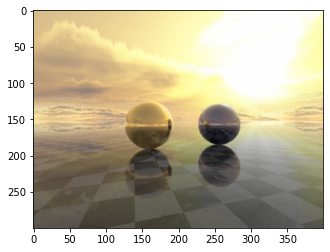

In [2]:
# define materials to use

gold_metal = Glossy(diff_color = rgb(1., .572, .184), n = vec3(0.15+3.58j, 0.4+2.37j, 1.54+1.91j),
                    roughness = 0.0, spec_coeff = 0.2, diff_coeff= 0.8) # n = index of refraction

bluish_metal = Glossy(diff_color = rgb(0.0, 0, 0.1), n = vec3(1.3+1.91j, 1.3+1.91j, 1.4+2.91j),
                      roughness = 0.2,spec_coeff = 0.5, diff_coeff= 0.3)

floor =  Glossy(diff_color = image("checkered_floor.png", repeat = 80.),   
                n = vec3(1.2+ 0.3j, 1.2+ 0.3j, 1.1+ 0.3j), roughness = 0.2, spec_coeff = 0.3, diff_coeff= 0.9 )

# Set Scene 

Sc = Scene(ambient_color = rgb(0.05, 0.05, 0.05))

angle = -np.pi/2 * 0.3
Sc.add_Camera(look_from = vec3(2.5*np.sin(angle), 0.25, 2.5*np.cos(angle)  -1.5 ), 
              look_at = vec3(0., 0.25, -3.), 
              screen_width = 400 ,
              screen_height = 300)

Sc.add_DirectionalLight(Ldir = vec3(0.52,0.45, -0.5),  color = rgb(0.15, 0.15, 0.15))

Sc.add(Sphere(material = gold_metal, center = vec3(-.75, .1, -3.),radius =  .6, max_ray_depth = 3))
Sc.add(Sphere(material = bluish_metal, center = vec3(1.25, .1, -3.), radius = .6, max_ray_depth = 3))

Sc.add(Plane(material = floor,  center = vec3(0, -0.5, -3.0), width = 120.0,height = 120.0, u_axis = vec3(1.0, 0, 0), v_axis = vec3(0, 0, -1.0),  max_ray_depth = 3))

#see sightpy/backgrounds
Sc.add_Background("stormydays.png")

# Render 
img = Sc.render(samples_per_pixel = 6)

#~ img.save("EXAMPLE1.png")
#~ img.show()

plt.imshow(img)
plt.show()


proccesing checkered_floor.png
proccesing miramar.jpeg
Render Took 6.80314564704895


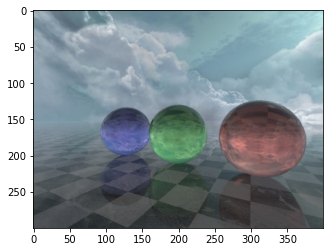

In [3]:
# define materials to use

blue_glass = Refractive(n = vec3(1.5 + 4e-8j,1.5 +  4e-8j,1.5 +  0.j)) # n = index of refraction
green_glass = Refractive(n = vec3(1.5 + 4e-8j,1.5 + 0.j,1.5 + 4e-8j))
red_glass = Refractive(n = vec3(1.5 + 0.j,1.5 +  5e-8j,1.5 +  5e-8j))

floor = Glossy(diff_color = image("checkered_floor.png", repeat = 80.), n = vec3(1.2+ 0.3j, 1.2+ 0.3j, 1.1+ 0.3j), roughness = 0.2, spec_coeff = 0.3, diff_coeff = 0.9)

# Set Scene 

Sc = Scene(ambient_color = rgb(0.05, 0.05, 0.05))

angle = np.pi/2 * 0.3
Sc.add_Camera(look_from = vec3(2.5*np.sin(angle), 0.25, 2.5*np.cos(angle)  -1.5 ), 
              look_at = vec3(0., 0.25, -1.5), 
              screen_width = 400 ,
              screen_height =300)


Sc.add_DirectionalLight(Ldir = vec3(0.52,0.45, -0.5),  color = rgb(0.15, 0.15, 0.15))

Sc.add(Sphere(material = blue_glass, center = vec3(-1.2, 0.0, -1.5), radius = .5, shadow = False ,max_ray_depth = 3))
Sc.add(Sphere(material = green_glass, center = vec3(0., 0.0, -1.5), radius = .5, shadow = False,max_ray_depth = 3))
Sc.add(Sphere(material = red_glass, center = vec3(1.2, 0.0, -1.5), radius = .5, shadow = False,max_ray_depth = 3))

Sc.add(Plane(material = floor,  center = vec3(0, -0.5, -3.0), width = 120.0,height = 120.0, u_axis = vec3(1.0, 0, 0), v_axis = vec3(0, 0, -1.0) ,max_ray_depth = 3))

#see sightpy/backgrounds
Sc.add_Background("miramar.jpeg")

# Render 
img = Sc.render(samples_per_pixel = 7)

#~ img.save("EXAMPLE2.png")
#~ img.show()

plt.imshow(img)
plt.show()


proccesing checkered_floor.png
proccesing stormydays.png
Render Took 2.522160291671753


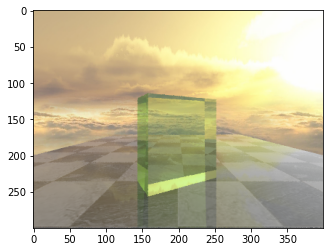

In [4]:
# define materials to use

floor = Glossy(diff_color = image("checkered_floor.png", repeat = 2.),
               roughness = 0.2, spec_coeff = 0.3, diff_coeff = 0.7,
               n = vec3(2.2, 2.2, 2.2)) # n = index of refraction

green_glass = Refractive(n = vec3(1.5 + 4e-8j,1.5 + 0.j,1.5 + 4e-8j)) 

# Set Scene 

Sc = Scene()
Sc.add_Camera(look_from = vec3(0., 0.25, 1. ), look_at = vec3(0., 0.25, -3.),
              screen_width = 400 ,
              screen_height = 300)


Sc.add_DirectionalLight(Ldir = vec3(0.0,0.5, 0.5),  color = rgb(0.5, 0.5, 0.5))

Sc.add(Plane(material = floor,  center = vec3(0, -0.5, -3.0), width = 6.0, height = 6.0, u_axis = vec3(1.0, 0, 0), v_axis = vec3(0, 0, -1.0) , max_ray_depth = 5))

cb = Cuboid( material = green_glass, center = vec3(0.00, 0.0001, -0.8), width = 0.9, height = 1.0, length = 0.4, shadow = False,  max_ray_depth = 5)
cb.rotate(θ = 30, u = vec3(0,1,0))
Sc.add(cb)

#see sightpy/backgrounds
Sc.add_Background("stormydays.png")

# Render 
img = Sc.render(samples_per_pixel = 4)

#~ img.save("EXAMPLE3.png")
#~ img.show()

plt.imshow(img)
plt.show()


proccesing lake.png
blurring lake.png
Render Took 2.5188426971435547


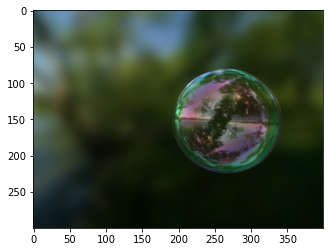

In [5]:
# Set Scene 

Sc = Scene(ambient_color = rgb(0.01, 0.01, 0.01))

angle = -np.pi*0.5 
Sc.add_Camera(screen_height =300,  screen_width = 400 , 
              look_from = vec3(4.0*np.sin(angle), 0.00, 4.0*np.cos(angle)  ),  
              look_at = vec3(0., 0.05, 0.0)) 

soap_bubble = ThinFilmInterference(thickness = 330, noise = 60.)
Sc.add(Sphere(material = soap_bubble, center = vec3(1., 0.0, 1.5), radius = 1.7, shadow = False, max_ray_depth = 5))

Sc.add_Background("lake.png", light_intensity = 5., blur = 10.)

# Render 
img = Sc.render(samples_per_pixel = 10)

#~ img.save("EXAMPLE4.png")
#~ img.show()

plt.imshow(img)
plt.show()


100% (10 of 10) |########################| Elapsed Time: 0:00:23 Time:  0:00:23


Render Took 23.54966163635254


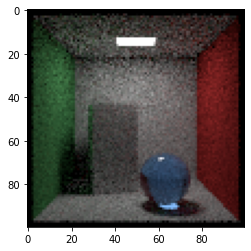

In [6]:
# Set Scene 

Sc = Scene(ambient_color = rgb(0.00, 0.00, 0.00))

angle = -0

Sc.add_Camera(screen_width = 100 ,screen_height = 100, 
              look_from = vec3(278, 278, 800), look_at = vec3(278,278,0), 
              focal_distance= 1., field_of_view= 40)

# define materials to use

green_diffuse=Diffuse(diff_color = rgb(.12, .45, .15))
red_diffuse=Diffuse(diff_color = rgb(.65, .05, .05))
white_diffuse=Diffuse(diff_color = rgb(.73, .73, .73))
emissive_white =Emissive(color = rgb(15., 15., 15.))
emissive_blue =Emissive(color = rgb(2., 2., 3.5))
blue_glass =Refractive(n = vec3(1.5 + 0.05e-8j,1.5 +  0.02e-8j,1.5 +  0.j))

# this is the light
Sc.add(Plane(material = emissive_white,  center = vec3(213 + 130/2, 554, -227.0 - 105/2),
             width = 130.0, height = 105.0, u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, 1.0)), 
       importance_sampled = True)

Sc.add(Plane(material = white_diffuse,  center = vec3(555/2, 555/2, -555.0),
             width = 555.0,height = 555.0, u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(1.0, 0, 0.0)))

Sc.add(Plane(material = green_diffuse,  center = vec3(-0.0, 555/2, -555/2),
             width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

Sc.add(Plane(material = red_diffuse,  center = vec3(555.0, 555/2, -555/2),
             width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

Sc.add(Plane(material = white_diffuse,  center = vec3(555/2, 555, -555/2),
             width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))

Sc.add(Plane(material = white_diffuse,  center = vec3(555/2, 0., -555/2),
             width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))

cb = Cuboid( material = white_diffuse, center = vec3(182.5, 165, -285-160/2),
            width = 165,height = 165*2, length = 165, shadow = False)
cb.rotate(θ = 15, u = vec3(0,1,0))
Sc.add(cb)

Sc.add(Sphere(material = blue_glass, center = vec3(370.5, 165/2, -65-185/2),
              radius = 165/2, shadow = False, max_ray_depth = 3),
       importance_sampled = True)

# Render

img = Sc.render(samples_per_pixel = 10, progress_bar = True)
# you are going to need more than 10 samples to remove the noise. At least 1000 for a nice image.

#~ img.save("cornell_box.png")
#~ img.show()

plt.imshow(img)
plt.show()
